In [211]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime, timedelta
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn
import scipy
from scipy.signal import argrelextrema
import numpy as np

In [212]:
# 30 Days ago
days_to_subtract = 365*3
end_date = (datetime.today())# - timedelta(days=1))#.strftime('%Y-%m-%d')
start_date = end_date-timedelta(days = days_to_subtract)

end_date = end_date.strftime('%Y-%m-%d')
start_date = start_date.strftime('%Y-%m-%d')

In [213]:
start_date

'2017-05-27'

In [214]:
# closing_values = hist['Close'].values
# max_indices = argrelextrema(closing_values, np.greater)
# min_indices = argrelextrema(closing_values, np.less)

Check previous 45 days. If on day 46 or 47, the high is greater than the 46 open by 5%, that is a postive. Else negative

In [215]:
def calculate_percent_increase(open_price, high_price):
    # Given an open price and a high price, calculate the percent increase
    return (high_price-open_price)/open_price

In [216]:
def create_model_df(historical_df):
    # This function goes through every 47 period window in our historical dataframe. It keeps the 45 previous close prices
    # As training data. It calculates the percent increase from the open on day 46 to the highest point on either day 46 or 47
    # creates a data frame with the previous 45 days. The date of day 46. And the label either 1 for buy, 0 for no buy
    open_prices = historical_df['Open'].values
    close_prices = historical_df['Close'].values
    high_prices = historical_df['High'].values
    dates = historical_df.index
    i = 0
    for j in range(45,len(historical_df)-1):
        prev_closes = close_prices[i:j]
        # get the label
        open_46 = open_prices[j]
        high_46 = high_prices[j]
        high_47 = high_prices[j+1]
        
        # get the highest price from either day 46 or day 47
        if high_46 > high_47:
            high_price = high_46
        else:
            high_price = high_47

        # Get the percent increase and deterimine if it should be a positive label or negative
        percent_increase = calculate_percent_increase(open_46, high_price)
        if percent_increase >=.06:
            label = 1
        else:
            label = 0

        # Create our model_df
        if i ==0:
            model_df = pd.DataFrame(prev_closes)
            model_df = model_df.T
            model_df['date'] = dates[j]
            model_df['label'] = label
        else:
            append_df = pd.DataFrame(prev_closes)
            append_df = append_df.T
            append_df['date'] = dates[j]
            append_df['label'] = label
            model_df = model_df.append(append_df)
        i+=1
    return model_df

In [217]:
Tickers = ["PINS", 'MSFT', 'AMD', 'LULU', 'AMAT', 'CSTM', 'PTON','DIS','NCLH','CGNX', 'FTNT', 'NVDA', 'AAPL']

# 3 Years of Data
days_to_subtract = 365*3
end_date = (datetime.today())
start_date = end_date-timedelta(days=days_to_subtract)

end_date = end_date.strftime('%Y-%m-%d')
start_date = start_date.strftime('%Y-%m-%d')

In [218]:
Tickers = ['PINS']

In [219]:
for i, ticker in enumerate(Tickers):
    company = yf.Ticker(ticker)
    hist = company.history(period='1d', interval = '1d', start = start_date, end = end_date)
    ticker_df = create_model_df(hist)
    ticker_df['ticker'] = ticker
    
    if i ==0:
        master_df = ticker_df
    else:
        master_df = master_df.append(ticker_df)

In [224]:
test_data = master_df.iloc[0]

In [264]:
test = master_df.iloc[1]

In [268]:
prev_closes = test.values[:-3]

In [269]:
#3est.iloc[:,:-3].rolling(window = 10, axis = 1).mean()
prev_closes

array([24.99, 25.85, 26.8, 28.8, 29.85, 34.26, 30.98, 31.23, 29.74, 28.36,
       29.5, 28.69, 29.51, 28.75, 29.05, 26.63, 28.99, 28.63, 30.86, 26.7,
       25.85, 25.41, 24.6, 23.8, 25.5, 25.8, 25.58, 25.51, 24.92, 24.4,
       24.2, 24.94, 25.81, 27.61, 27.94, 26.48, 27.05, 26.95, 27.41,
       27.85, 28.8, 28.09, 27.54, 27.98, 26.69], dtype=object)

In [270]:
my_df = pd.DataFrame(prev_closes)

In [280]:
my_df.T

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,24.99,25.85,26.8,28.8,29.85,34.26,30.98,31.23,29.74,28.36,...,26.48,27.05,26.95,27.41,27.85,28.8,28.09,27.54,27.98,26.69


In [304]:
my_df.T.rolling(window = 20, axis = 1).mean().iloc[:,-26:].values

array([[28.9085, 28.9515, 28.9295, 28.8195, 28.5695, 28.352 , 27.929 ,
        27.659 , 27.373 , 27.132 , 26.934 , 26.669 , 26.4815, 26.2965,
        26.2395, 26.184 , 26.1765, 26.0795, 25.9955, 25.823 , 25.8805,
        26.028 , 26.162 , 26.309 , 26.518 , 26.5775]])

In [285]:
my_df = pd.DataFrame(prev_closes)
twenty = my_df.T.rolling(window = 20, axis = 1).mean().iloc[:,-26:].values[0]
ten = my_df.T.rolling(window = 10, axis = 1).mean().iloc[:,-26:].values[0]

In [298]:
twenty_over_ten = []
for i in range(0,26):
    if twenty[i]>ten[i]:
        twenty_over_ten.append(0)
    else:
        twenty_over_ten.append(1)

In [302]:
first_up = twenty_over_ten.index(1)

18

In [ ]:
if 

In [299]:
twenty_over_ten

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

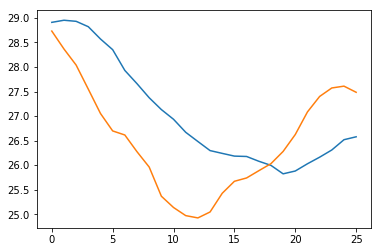

In [297]:
plt.plot(twenty)
plt.plot(ten)

In [235]:
test.iloc[:,-13:]

,35,36,37,38,39,40,41,42,43,44,date,label,ticker
0,27.94,26.48,27.05,26.95,27.41,27.85,28.80,28.09,27.54,27.98,2019-06-24,0,PINS
0,26.48,27.05,26.95,27.41,27.85,28.80,28.09,27.54,27.98,26.69,2019-06-25,0,PINS
0,27.05,26.95,27.41,27.85,28.80,28.09,27.54,27.98,26.69,26.14,2019-06-26,0,PINS
0,26.95,27.41,27.85,28.80,28.09,27.54,27.98,26.69,26.14,26.23,2019-06-27,0,PINS
0,27.41,27.85,28.80,28.09,27.54,27.98,26.69,26.14,26.23,27.23,2019-06-28,0,PINS


In [239]:
np.sum([27.94,26.48,27.05,26.95,27.41,27.85,28.80,28.09,27.54,27.98])/10

27.608999999999998

In [225]:
test_data

0                        24.4
1                       24.99
2                       25.85
3                        26.8
4                        28.8
5                       29.85
6                       34.26
7                       30.98
8                       31.23
9                       29.74
10                      28.36
11                       29.5
12                      28.69
13                      29.51
14                      28.75
15                      29.05
16                      26.63
17                      28.99
18                      28.63
19                      30.86
20                       26.7
21                      25.85
22                      25.41
23                       24.6
24                       23.8
25                       25.5
26                       25.8
27                      25.58
28                      25.51
29                      24.92
30                       24.4
31                       24.2
32                      24.94
33        

In [158]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn import  metrics
from sklearn.model_selection import train_test_split

In [159]:
from sklearn import svm

In [160]:
data = master_df[master_df['ticker']=='CSTM']

In [161]:
clf = svm.SVC(probability=True)

In [191]:
train_X, test_X, train_y, test_y = train_test_split(data, data['label'], test_size = .2)

In [163]:
clf.fit(train_X.iloc[:,:-3], train_y)
predictions = clf.predict_proba(test_X.iloc[:,:-3])

/Users/Drewpearson/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [164]:
aftermath = test_X
aftermath['predictions'] = predictions[:,1]

/Users/Drewpearson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [182]:
df = train_X.sample(frac=1).reset_index(drop=True)

In [185]:
train_X.sample()

113.0

In [192]:
train_X.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,date,label,ticker
0,11.50,10.60,10.65,10.60,10.25,10.30,10.30,10.20,10.90,10.85,...,11.25,11.30,11.40,11.60,11.50,11.25,11.75,2018-08-27,0,CSTM
0,12.60,12.40,12.40,12.45,12.35,12.30,12.25,11.90,11.85,11.40,...,12.30,12.35,12.35,12.42,12.40,12.21,11.72,2018-10-05,0,CSTM
0,11.93,12.66,12.66,12.89,12.80,12.01,12.07,11.72,11.19,11.39,...,13.63,13.50,13.85,13.65,13.70,13.06,13.27,2019-09-26,0,CSTM
0,10.50,10.45,10.15,10.10,10.00,10.20,10.10,9.95,9.80,9.90,...,12.75,12.85,13.95,13.10,12.70,12.95,12.95,2018-02-08,0,CSTM
0,9.07,9.09,9.45,9.43,9.32,9.52,9.74,9.67,9.46,9.49,...,8.82,8.83,9.01,9.20,9.59,9.40,9.52,2019-04-23,1,CSTM


In [198]:
for i in range(1,6):
    #print (i)
    splice_size = int(len(train_X)/5)
    #print (splice_size)
    #train_data = df.iloc[]
    dev = train_X.iloc[(i-1)*splice_size:i*splice_size]
    # train is everything before the dev set and everything after
    train_before = train_X.iloc[0:(i-1)*splice_size]
    train_after = train_X.iloc[i*splice_size:]
    train = train_before.append(train_after)
    print (len(dev))
    

113
113
113
113
113


In [205]:
def cross_validate(training_data):
    # 5 fold cross validation on the training set, determine the optimal threshold
    for i in range(1,6):
        splice_size = int(len(training_data)/5)
        dev = training_data.iloc[(i-1)*splice_size:i*splice_size]
        
        # train is everything before the dev set and everything after
        train_before = training_data.iloc[0 : (i-1)*splice_size]
        train_after = training_data.iloc[i*splice_size :]
        train = train_before.append(train_after)
        
        clf = svm.SVC(probability=True)
        clf.fit(train.iloc[:,:-3], train['label'])
        
        predictions = clf.predict_proba(dev.iloc[:,:-3])
        aftermath = dev
        aftermath['predictions'] = predictions[:,1]
        if i ==1:
            prediction_df = aftermath
        else:
            prediction_df = prediction_df.append(aftermath)
    return prediction_df

In [206]:
test = cross_validate(train_X)

/Users/Drewpearson/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Drewpearson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Drewpearson/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Use

In [207]:
len(test), len(train_X)

(565, 565)

In [178]:
def optimal_threshold(aftermath):
    thresholds = np.arange(1,20)
    thresholds = thresholds/20
    max_success_rate = 0
    for threshold in thresholds:
        buys = aftermath[aftermath['predictions']>threshold]
        good_buy = buys[buys['label']==1]
        bad_buy = buys[buys['label']==0]
        if len(buys)<5:
            continue
        success_rate = len(good_buy)/len(bad_buy)
        if success_rate > max_success_rate:
            max_success_rate = success_rate
            optimal_threshold = threshold
            buy_info = (len(buys), len(good_buy))
    return optimal_threshold, buy_info

In [208]:
optimal_threshold, buy_info = optimal_threshold(test)

In [209]:
optimal_threshold

0.7

In [210]:
buy_info

(9, 7)

In [165]:
def box_plot(data_to_plot, x_labels):
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))
    # Create an axes instance
    ax = fig.add_subplot(111)
    # Create the boxplot
    bp = ax.boxplot(data_to_plot, whis = [5,95])

    ax.set_ylabel('Predictions (Probability of Same)')
    ax.set_xlabel('Progen Classification')
    
    ax.set_xticklabels(x_labels)
    plt.show()

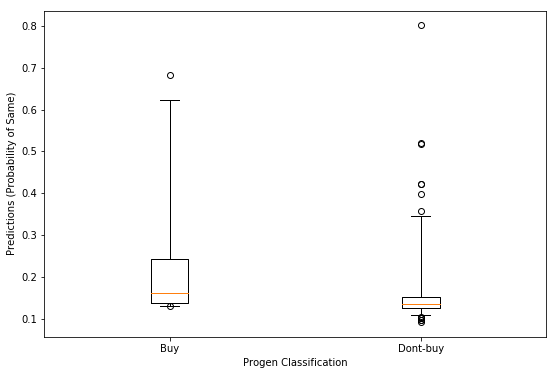

In [166]:
data_to_plot = [aftermath[aftermath['label']==1]['predictions'],
           aftermath[aftermath['label']==0]['predictions']]
x_labels = ['Buy', 'Dont-buy']

box_plot(data_to_plot, x_labels)

In [27]:
aftermath[aftermath['predictions']>.4].label.value_counts()

1    5
0    4
Name: label, dtype: int64

/Users/Drewpearson/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Drewpearson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


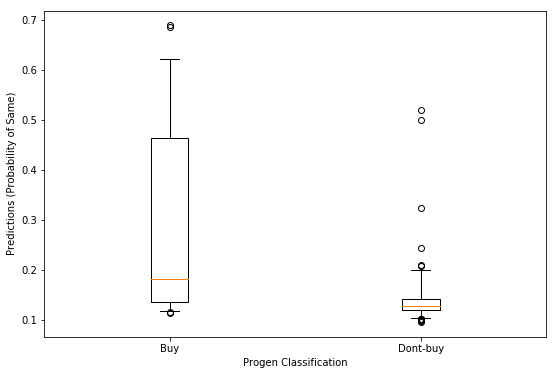

8.45 8.39
5.96 5.76


In [140]:
for ticker in Tickers:
    # Change this
    # Example
    ticker = 'CSTM'
    plot = True
    
    # Get data and train a SVM model
    data = master_df[master_df['ticker']==ticker]
    train_X, test_X, train_y, test_y = train_test_split(data, data['label'], test_size = .2)
    
    clf = svm.SVC(probability=True)
    clf.fit(train_X.iloc[:,:-3], train_y)
    
    # take the predictions and create an aftermath dataframe
    predictions = clf.predict_proba(test_X.iloc[:,:-3])
    aftermath = test_X
    aftermath['predictions'] = predictions[:,1]
    # plot the data
    if plot == True:
        data_to_plot = [aftermath[aftermath['label']==1]['predictions'],
               aftermath[aftermath['label']==0]['predictions']]
        x_labels = ['Buy', 'Dont-buy']

        box_plot(data_to_plot, x_labels)
    # Find the optimal threshold
    optimal_threshold = .4
    
    # Determine the buy_orders that would be placed with that threshold an determine their returns
    buy_orders = aftermath[aftermath['predictions']>optimal_threshold]
    company = yf.Ticker(ticker)
    hist = company.history(period='1d', interval = '1d', start = start_date, end = end_date)
    hist['index'] = np.arange(0,len(hist))
    
    results_dict = calculate_return(ticker, buy_orders, hist)
    break

In [141]:
results_dict = calculate_return(ticker, buy_orders, hist)

8.45 8.39
5.96 5.76


In [142]:
results_dict

{'ticker': 'CSTM',
 'purchases': 9,
 'classic_success': 7,
 'classic_failures': 2,
 'total_investment': 58.04,
 'investment_success': 43.629999999999995,
 'investment_failure': 14.41,
 'dollar_success': 45.8115,
 'two_day_get_out': 14.15,
 'hold_gains': 15.130500000000001,
 'days_held': [3, 3],
 'never_sold_closeout': 0,
 'two_day_strategy': 59.9615,
 'two_day_strategy_roi': 0.03310647829083394,
 'hold_strategy': 60.94200000000001,
 'hold_strategy_roi': 0.05000000000000014}

In [ ]:
# Get data for a ticker
# train data for that ticker
# make predictions
# Find optimal threshold
# take all purchases above threshold
# Look into gains and losses if using those predictions


# Gains and Loses

In [60]:
buy_orders = aftermath[aftermath['predictions']>.4]
company = yf.Ticker('CSTM')
hist = company.history(period='1d', interval = '1d', start = start_date, end = end_date)
hist['index'] = np.arange(0,len(hist))

In [40]:
aftermath.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,date,label,ticker,predictions
0,8.91,8.46,8.31,8.61,8.81,8.95,8.89,9.05,9.00,9.10,...,9.11,8.99,9.58,9.56,9.25,9.25,2019-05-09,0,CSTM,0.110945
0,10.95,10.90,10.80,10.90,10.95,11.40,11.15,11.45,11.65,11.95,...,12.80,12.65,12.20,12.90,13.05,12.50,2018-02-27,0,CSTM,0.096696
0,8.88,8.65,9.07,9.09,9.45,9.43,9.32,9.52,9.74,9.67,...,8.81,8.82,8.83,9.01,9.20,9.59,2019-04-18,0,CSTM,0.135609
0,10.85,10.75,10.75,10.40,11.50,12.15,12.10,11.20,11.10,11.55,...,9.90,9.95,10.35,10.95,10.90,10.80,2017-12-26,0,CSTM,0.179929
0,12.10,11.20,11.10,11.55,11.55,11.50,11.15,10.90,10.15,10.25,...,10.90,10.95,11.40,11.15,11.45,11.65,2018-01-04,0,CSTM,0.120713


In [138]:
def hold_till_up(hist, index, open_price):
    """Function holds the stock until it hits a 5% gain"""
    hold_gain = 0
    hold_days = 0
    never_sold = 0
    # go through every day from day of purchase, calculate if high was above 5% open price. If so, sell. 
    sold = False
    # Index is the day you bought. So, we want to add days to index from index + 0 all the way 
    # to index + remaining days (remaining = len(hist)-index)
    for i in range(0,(len(hist)-index)[0]):
        high = hist.iloc[index+i]['High'].values[0]
        if (high-open_price)/open_price >= .05:
            hold_gain += 1.05 * open_price
            hold_days = i+1
            sold = True
            break
    # If you never sold it, you would still be holding, so close out
    if sold == False:
        close = hist.iloc[index+i]['Close'].values[0]
        never_sold += close-open_price
        hold_days = 0
    
    return hold_gain, hold_days, never_sold
        
        
            

In [139]:
def calculate_return(ticker, buy_orders, hist):
    dollar_success = 0
    two_day_dollar_fail = 0
    investment = 0
    hold_gains = 0
    days_held = []
    never_sold_closeout = 0
    investment_success = 0
    investment_failure = 0
    total_investment = 0

    results_dict = {}
    for i, row in buy_orders.iterrows():

        if row['label'] ==1:
            # Get the data for the date you are buying at open. Get the max high and make sure it was over 5% 
            index = hist[hist.index==row['date']]['index']
            # get the open price
            open_price = hist[hist.index==row['date']]['Open'].values[0]
            # Get the two high prices and ensure that one of them was higher than 5% of open
            high1 = hist[hist.index==row['date']]['High'].values[0]
            high2 = hist.iloc[index+1]['High'].values[0]
            if (max(high1,high2)-open_price)/open_price <=.05:
                print ('problem')
            # I would trigger a limit sell at 5% higher than open, so the increase is 1.05*open
            dollar_success += 1.05 * open_price
            investment_success += open_price

        else:
            # for loses, I would have three potential strategies. 
            # 1. get out after two days
            # 2. hold until it gets up 5%
            # 3. set up a trailing loss function so, if the price dips x% sell

            #### Option 1 (get out after two days) ####
            index = hist[hist.index==row['date']]['index']
            open_price = hist[hist.index==row['date']]['Open'].values[0]
            close2 = hist.iloc[index+1]['Close'].values[0]
            print (open_price, close2)
            two_day_dollar_fail += close2

            #### Option 2 hold until it gets up 5% ####
            # Go through each day and if the high is above 5% I would sell. Otherwise go to next day, 
            # until there are no days left
            hold_gain, hold_days, never_sold = hold_till_up(hist, index, open_price)
            hold_gains += hold_gain
            days_held.append(hold_days)
            never_sold_closeout += never_sold

            investment_failure += open_price
            #### Option 3 Set up a selling trigger ####


        total_investment += open_price

    results_dict['ticker'] = ticker
    results_dict['purchases'] = len(buy_orders)
    results_dict['classic_success'] = len(buy_orders[buy_orders['label']==1])
    results_dict['classic_failures'] = len(buy_orders[buy_orders['label']==0])
    results_dict['total_investment']  = total_investment
    results_dict['investment_success'] = investment_success
    results_dict['investment_failure'] = investment_failure
    results_dict['dollar_success'] = dollar_success
    results_dict['two_day_get_out'] = two_day_dollar_fail
    results_dict['hold_gains'] = hold_gains
    results_dict['days_held'] = days_held
    results_dict['never_sold_closeout'] = never_sold_closeout
    results_dict['two_day_strategy'] = dollar_success+two_day_dollar_fail
    results_dict['two_day_strategy_roi'] = ((dollar_success+two_day_dollar_fail)-total_investment)/total_investment
    results_dict['hold_strategy'] = dollar_success+hold_gains
    results_dict['hold_strategy_roi'] = ((dollar_success+hold_gains)-total_investment)/total_investment
    
    return results_dict

In [124]:
results_dict

{'purchases': 9,
 'classic_success': 5,
 'classic_failures': 4,
 'total_investment': 60.980000000000004,
 'investment_success': 33.510000000000005,
 'investment_failure': 27.47,
 'dollar_success': 35.185500000000005,
 'two_day_get_out': 27.05,
 'hold_gains': 28.843500000000006,
 'days_held': [3, 7, 4, 3],
 'never_sold_closeout': 0,
 'two_day_strategy': 62.2355,
 'two_day_strategy_roi': 0.020588717612331876}

In [122]:
(35.1855-33.51)/33.51

0.04999999999999999

In [104]:
1.05*(5.96+7.75+5.31+8.45)

28.8435

In [84]:
.03*6.14

0.18419999999999997

In [80]:
print (index)

Date
2018-11-29    386
Name: index, dtype: int64


In [81]:
hist.iloc[index+1]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,index
Date,,,,,,,,
2018-11-30,8.51,8.53,8.28,8.39,969100,0,0,387


In [76]:
dollar_gain

47.4075

In [77]:
dollar_fail

-0.41999999999999815

In [73]:
hist.iloc[736:740]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,index
Date,,,,,,,,
2020-04-23,5.96,6.14,5.82,6.00,1118100,0,0,736
2020-04-24,6.02,6.13,5.70,5.76,834400,0,0,737
2020-04-27,5.82,7.03,5.70,6.73,1911400,0,0,738
2020-04-28,6.94,7.01,6.33,6.72,4083100,0,0,739


In [63]:
hist.iloc[736]

Open                  5.96
High                  6.14
Low                   5.82
Close                 6.00
Volume          1118100.00
Dividends             0.00
Stock Splits          0.00
index               736.00
Name: 2020-04-23 00:00:00, dtype: float64

In [55]:
date +timedelta(days=2)

Timestamp('2020-04-25 00:00:00')

In [48]:
(6.14-5.96)/5.96 = .05

0.030201342281879148

# Tpot

In [43]:
###convert labels into binary
from tpot import TPOTClassifier

In [44]:
tpot = TPOTClassifier(generations=8, population_size=30, verbosity=2, scoring="f1_weighted")

In [45]:
tpot.fit(train_X.iloc[:,:-3], train_y)

Generation 1 - Current best internal CV score: 0.7907083461982038
Generation 2 - Current best internal CV score: 0.7907083461982038
Generation 3 - Current best internal CV score: 0.792988073700592
Generation 4 - Current best internal CV score: 0.8000708951440514
Generation 5 - Current best internal CV score: 0.8028795217574827
Generation 6 - Current best internal CV score: 0.8028795217574827
Generation 7 - Current best internal CV score: 0.8028858267395129
Generation 8 - Current best internal CV score: 0.8028858267395129

Best pipeline: XGBClassifier(Nystroem(input_matrix, gamma=0.7000000000000001, kernel=linear, n_components=6), learning_rate=1.0, max_depth=8, min_child_weight=4, n_estimators=100, nthread=1, subsample=0.45)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=8,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=30,
        random_state=None, scoring='f1_weighted', subsample=1.0,
        use_dask=False, verbosity=2, warm_start=False)

In [46]:
tpot.export('../tpot_model.py')

In [50]:
predictions = tpot.predict_proba(test_X.iloc[:,:-4])

In [52]:
predictions[0]

array([9.9994332e-01, 5.6693254e-05], dtype=float32)

In [56]:
test_X['tpot_pred'] = predictions[:,1:]

/Users/Drewpearson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


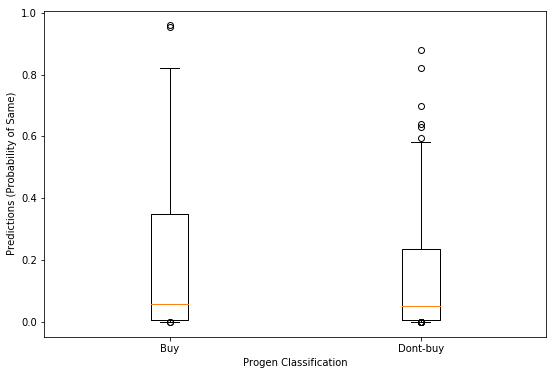

In [58]:
data_to_plot = [aftermath[aftermath['label']==1]['tpot_pred'],
               aftermath[aftermath['label']==0]['tpot_pred']]
x_labels = ['Buy', 'Dont-buy']

box_plot(data_to_plot, x_labels)

In [64]:
aftermath[aftermath['tpot_pred']>.8].label.value_counts()

1    3
0    2
Name: label, dtype: int64